# Proyek Analisis Data: E-Commerce Public
- **Nama:** Michael Albert Yulianto
- **Email:** m239b4ky2478@bangkit.academy
- **ID Dicoding:** Michael Albert Yulianto

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak terjual?
- Kota manakah yang paling banyak pelanggan tinggal/berasal?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# untuk menampilkan seluruh data tanpa limit
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
payment_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/olist_order_payments_dataset.csv")
print(payment_df.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [7]:
category_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/product_category_name_translation.csv")
print(category_df.head())

    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


In [8]:
product_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/olist_products_dataset.csv")
print(product_df.head())

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

In [9]:
order_item_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/olist_order_items_dataset.csv")
print(order_item_df.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [10]:
customers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/olist_customers_dataset.csv")
print(customers_df.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [11]:
order_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/olist_orders_dataset.csv")
print(order_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

### Assessing Data

**Mencari Informasi dari dataset**

In [12]:
print(payment_df.info())
print('\n')
print(category_df.info())
print('\n')
print(product_df.info())
print('\n')
print(order_item_df.info())
print('\n')
print(customers_df.info())
print('\n')
print(order_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32

**Mengidentifikasi data yang kosong(NaN)**

In [13]:
print(payment_df.isna().sum())
print('\n')
print(category_df.isna().sum())
print('\n')
print(product_df.isna().sum())
print('\n')
print(order_item_df.isna().sum())
print('\n')
print(customers_df.isna().sum())
print('\n')
print(order_df.isna().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


product_category_name            0
product_category_name_english    0
dtype: int64


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


order_id                            0
customer_id                         0
order_status      

**Mencari data duplikat**

In [14]:
print("Payment :",payment_df.duplicated().sum())
print('\n')
print("Category :",category_df.duplicated().sum())
print('\n')
print("Product :",product_df.duplicated().sum())
print('\n')
print("Order :",order_item_df.duplicated().sum())
print('\n')
print("Customers :",customers_df.duplicated().sum())
print('\n')
print("Order :",order_df.duplicated().sum())

Payment : 0


Category : 0


Product : 0


Order : 0


Customers : 0


Order : 0


In [15]:
print(payment_df.describe())
print('\n')
print(category_df.describe())
print('\n')
print(product_df.describe())
print('\n')
print(order_item_df.describe())
print('\n')
print(customers_df.describe())
print('\n')
print(order_df.describe())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000  

### Cleaning Data

**Menghapus data yang tidak lengkap**

In [16]:
product_df.dropna(inplace=True)
print(product_df.isna().sum())


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

**Gabungkan Data**

In [17]:
merged_df = pd.merge(order_item_df, product_df, on='product_id', how='left')

merged_df = pd.merge(merged_df, category_df, on='product_category_name', how='left')

merged_df = pd.merge(merged_df, payment_df, on='order_id', how='left')

merged_df = pd.merge(merged_df, order_df, on='order_id', how='left')

merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')

print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117604 non-null  object 
 1   order_item_id                  117604 non-null  int64  
 2   product_id                     117604 non-null  object 
 3   seller_id                      117604 non-null  object 
 4   shipping_limit_date            117604 non-null  object 
 5   price                          117604 non-null  float64
 6   freight_value                  117604 non-null  float64
 7   product_category_name          115905 non-null  object 
 8   product_name_lenght            115905 non-null  float64
 9   product_description_lenght     115905 non-null  float64
 10  product_photos_qty             115905 non-null  float64
 11  product_weight_g               115905 non-null  float64
 12  product_length_cm             

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling banyak terjual?

**Mencari angka penjualan tiap kategori**

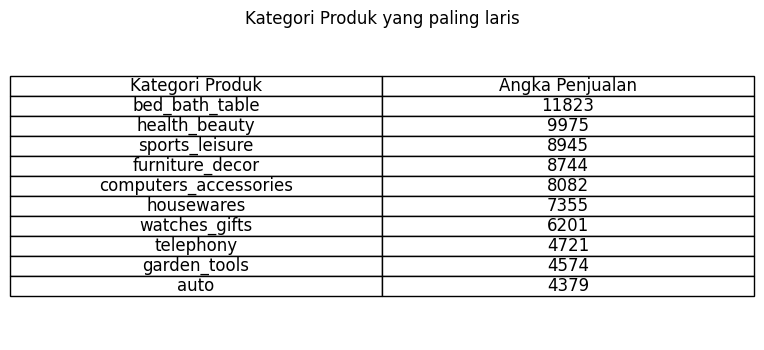

In [24]:
top_10_product_category = merged_df.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False).head(10)
op_10_product_category_df = top_10_product_category.reset_index()
top_10_product_category_df.columns = ['Kategori Produk', 'Angka Penjualan']

fig, ax = plt.subplots(figsize=(8, 4))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=top_10_product_category_df.values, colLabels=top_10_product_category_df.columns, cellLoc='center', loc='center')

table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Kategori Produk yang paling laris')
plt.show()


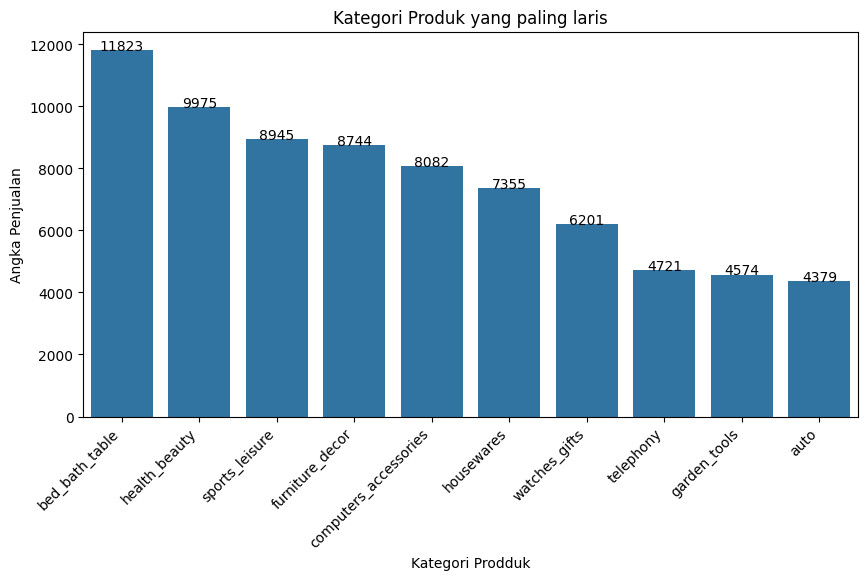

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_product_category.index, y=top_10_product_category.values)

plt.title('Kategori Produk yang paling laris')
plt.xlabel('Kategori Prodduk')
plt.ylabel('Angka Penjualan')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(top_10_product_category.values):
    plt.text(i, value + 0.5, f'{value}', ha='center')

plt.show()



### Pertanyaan 2: Kota manakah yang paling banyak pelanggan tinggal/berasal?

**Menghitung jumlah pelanggan tiap daerah**

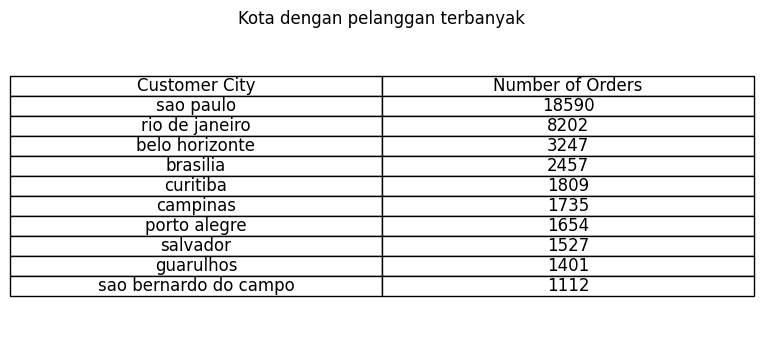

In [26]:
top_10_customer_city = merged_df.groupby('customer_city')['order_id'].count().sort_values(ascending=False).head(10)

top_10_customer_city_df = top_10_customer_city.reset_index()
top_10_customer_city_df.columns = ['Customer City', 'Number of Orders']

fig, ax = plt.subplots(figsize=(8, 4))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=top_10_customer_city_df.values, colLabels=top_10_customer_city_df.columns, cellLoc='center', loc='center')

table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Kota dengan pelanggan terbanyak')
plt.show()

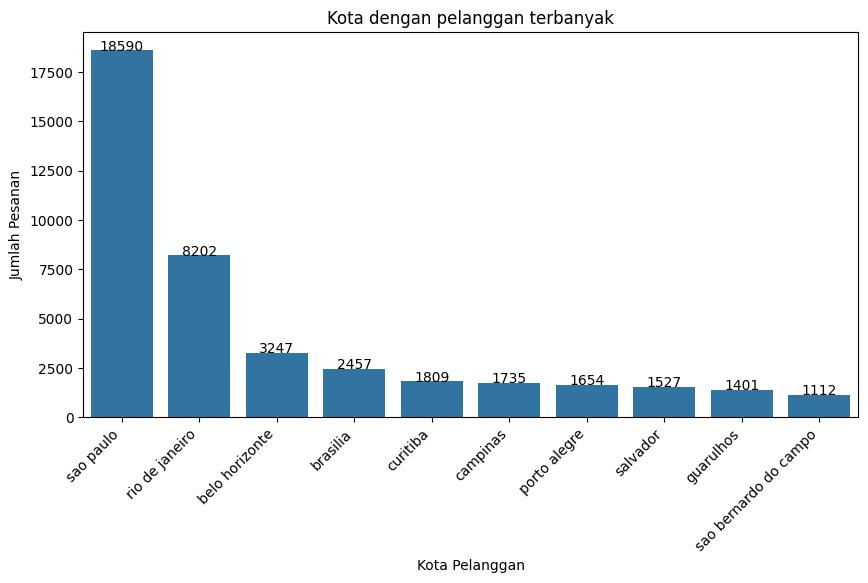

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_customer_city.index, y=top_10_customer_city.values)

plt.title('Kota dengan pelanggan terbanyak')
plt.xlabel('Kota Pelanggan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(top_10_customer_city.values):
    plt.text(i, value + 0.5, f'{value}', ha='center')

plt.show()


## Conclusion

# **Conclution pertanyaan 1**

Berdasarkan grafik yang ditampilkan, berikut adalah kesimpulan yang dapat diambil:

1. Kategori Produk Paling Laris:

  *   Kategori bed bath table menempati posisi pertama sebagai kategori produk dengan angka penjualan tertinggi, yaitu sebanyak 11.823 penjualan.

2. Kategori Populer Lainnya:

  *   Kategori health beauty berada di urutan kedua dengan 9.975 penjualan, disusul oleh sports leisure dengan 8.945 penjualan.
  *   Kategori furniture decor, computers accessories, dan housewares juga termasuk dalam kategori populer dengan jumlah penjualan yang tinggi, masing-masing sebanyak 8.744, 8.082, dan 7.355 penjualan.

3. Kategori dengan Penjualan Rendah:

  *   Kategori dengan penjualan terendah di antara 10 besar adalah auto dengan 4.379 penjualan, diikuti oleh garden tools dengan 4.574 penjualan dan telephony dengan 4.721 penjualan.

4. Distribusi Penjualan:

  *   Secara keseluruhan, terdapat variasi yang signifikan dalam jumlah penjualan antara kategori produk. Produk di kategori rumah tangga seperti bed bath table dan health beauty mendominasi penjualan, sementara kategori seperti auto dan garden tools memiliki performa yang lebih rendah.


Dari hasil ini, perusahaan dapat mempertimbangkan untuk lebih fokus pada kategori produk yang mendominasi pasar serta mengeksplorasi strategi pemasaran atau promosi lebih lanjut untuk kategori yang memiliki penjualan lebih rendah.



---



# **Conclution pertanyaan 2**
Berdasarkan grafik yang ditampilkan, berikut adalah kesimpulan yang dapat diambil:

1. Kota dengan Jumlah Pesanan Tertinggi:

  * Sao Paulo menempati posisi pertama dengan jumlah pesanan tertinggi, yaitu sebanyak 18.590 pesanan, menunjukkan bahwa kota ini adalah pasar terbesar untuk pesanan pelanggan.

2. Kota dengan Pesanan Signifikan Lainnya:

  * Rio de Janeiro berada di urutan kedua dengan 8.202 pesanan, meskipun jauh di bawah Sao Paulo, masih merupakan kota dengan permintaan yang cukup tinggi.
  * Belo Horizonte mencatat 3.247 pesanan, diikuti oleh Brasília dengan 2.457 pesanan, dan Curitiba dengan 1.809 pesanan.

3. Kota dengan Pesanan Lebih Rendah:

  * Kota seperti Campinas, Porto Alegre, dan Salvador memiliki jumlah pesanan antara 1.500 hingga 2.000 pesanan.
  * Sementara itu, Guarulhos dan São Bernardo do Campo berada di urutan terakhir dengan masing-masing 1.401 dan 1.112 pesanan.
4. Distribusi Pesanan:
  * Terlihat ada disparitas yang besar antara Sao Paulo dan kota-kota lainnya, terutama dibandingkan dengan kota-kota yang pesanan di bawah 2.000. Ini menunjukkan bahwa Sao Paulo adalah pasar dominan bagi penjualan, dengan Rio de Janeiro menjadi runner-up yang signifikan, namun masih jauh tertinggal.

Dari analisis ini, strategi pemasaran dan penjualan dapat difokuskan lebih banyak pada kota-kota dengan pesanan tinggi, seperti Sao Paulo dan Rio de Janeiro, serta peluang untuk meningkatkan pesanan di kota-kota dengan permintaan lebih rendah.